In [1]:
%load_ext autoreload
%autoreload 2
from fun import *
os.environ['QT_QPA_PLATFORM']='offscreen'

In [2]:
seq_filename = 'fasta_files/gravin_seq_prot.fa'
msa_filename = 'fasta_files/msa/gravin_seq_align_prot.fa'
Gravin_model_species = binding_regions()
Gravin_model_species.muscle_msa(seq_filename, msa_filename)

# Parse msa and original sequences
Gravin_seqs = Gravin_model_species.parse_fasta_file(seq_filename)
Gravin_msa = Gravin_model_species.parse_fasta_file(msa_filename)

# We will use as a reference the human architecture
ref = 'Homo_sapiens'

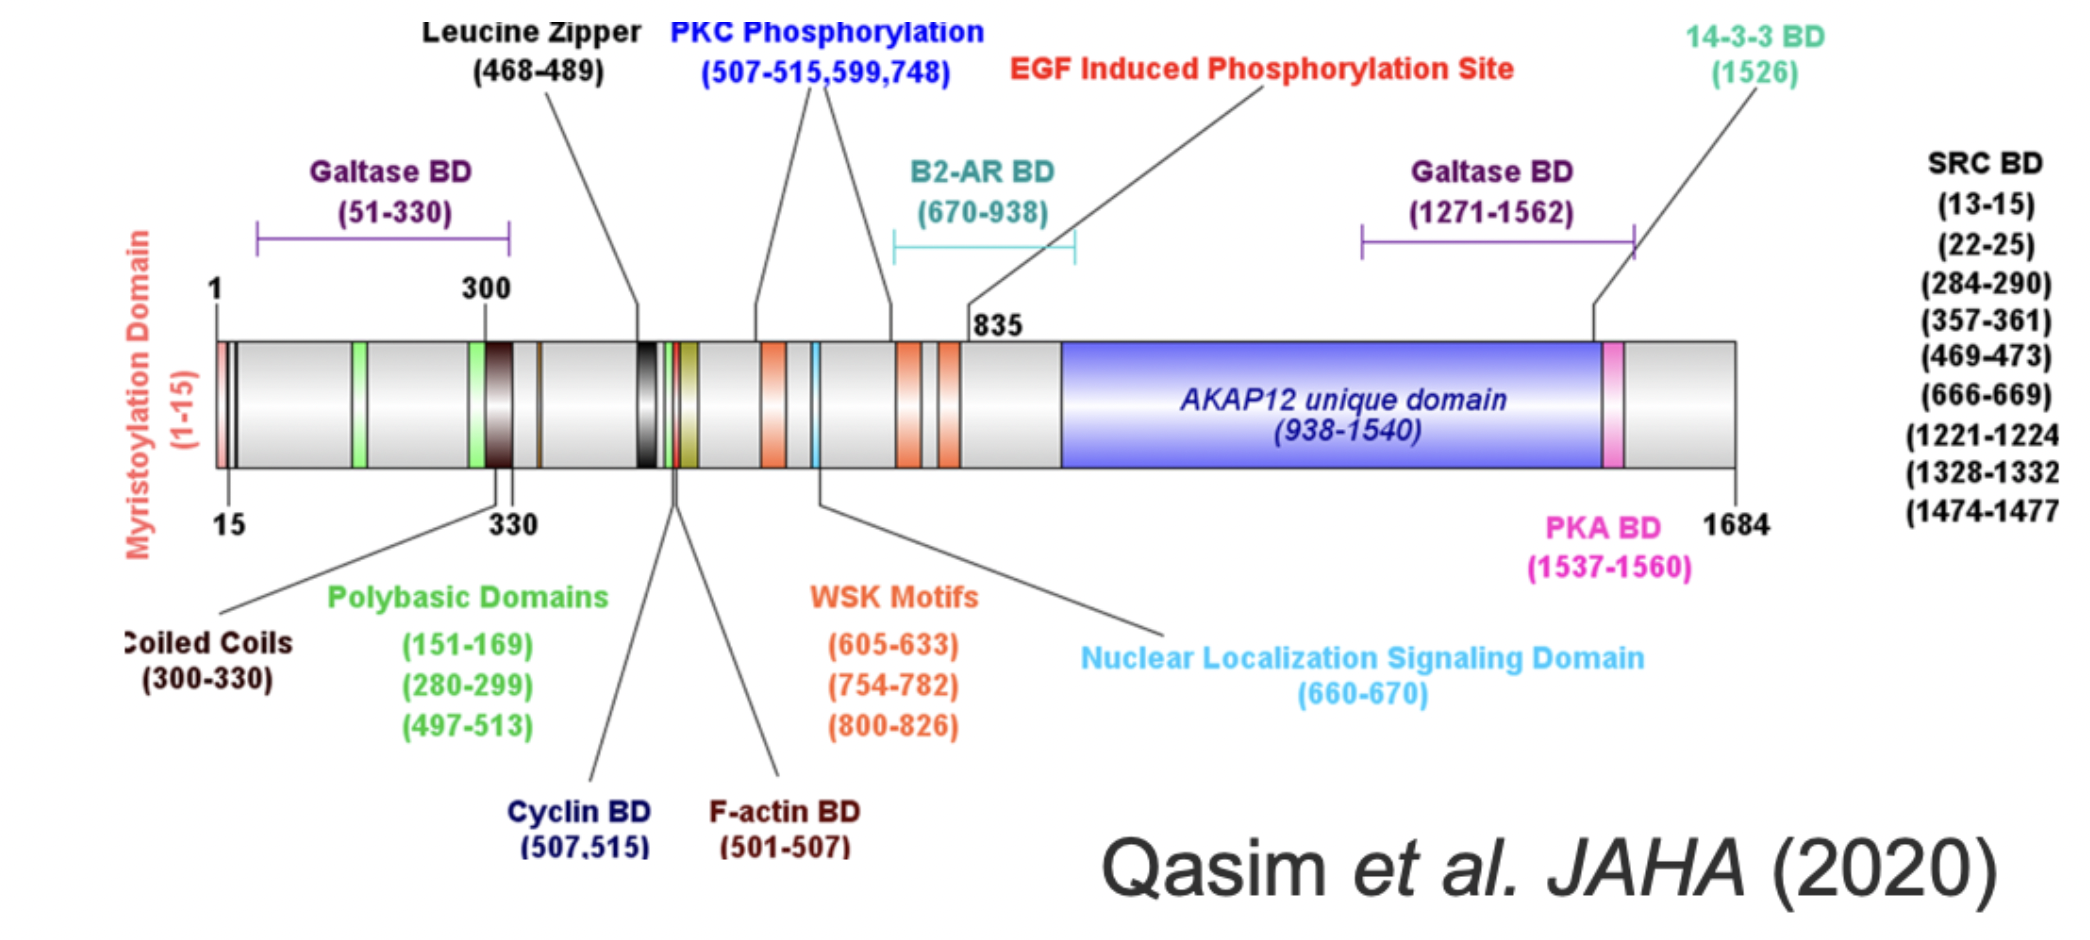

### Binding partners:

##### Having the human architecture we will  look at the alignment in the different reference coordinates:

### 2. PKA - mediated by the RII binding domain- [Church et al. eLife (2021)](https://elifesciences.org/articles/68164)

In [3]:
# Calcineurin binding region 
base_string_RII_binding = 'NGILELETKSSKLVQNIIQTAVD'
start, end = Gravin_model_species.find_binding_region(base_string_RII_binding, ref, Gravin_msa)
filename = 'fasta_files/binding_regions/Gravin_RII_binding.fa'
regions_dict_RII_binding, aln = seq_domain_alignment(Gravin_msa, Gravin_seqs, start, end, filename,
                                                     binding_partner = 'RII_binding')

In [4]:
print(f'The RII_binding region is missing in the following model species: {[i for i in Gravin_seqs.keys() if i not in regions_dict_RII_binding.keys()]}')
alv.view(aln)

The RII_binding region is missing in the following model species: ['Anolis_carolinensis']
Takifugu_r QEDVKQAVEVQRCNETV--------I-LEEVK
Callorhinc KQVADLDAKVCSASIEVQAAENEAAIPITAVP
Danio_reri PKIV---NEAIQIAETV--------P-VSITD
Monodelphi PSSIGMGSEPSWITDRVSSSSSSAAM-TSALS
Mus_muscul PEILELESKSNKIVQSV--------I-QTAVD
Homo_sapie NGILELETKSSKLVQNI--------I-QTAVD
Canis_lupu NDLSKLQTESSKLVQNV--------I-QTVVG
Sus_scrofa NEILKLETESCRLVQNV--------I-QTVVD
Bos_taurus SEISKLEKESCRLVESV--------I-QTAVD
Xenopus_tr IYSMPVEQQSTTVTEDT--------V-ITNIP
Ornithorhy NQTLTIESQSSKIVQNV--------I-QTAVE
Gallus_gal VPSGTIESQSTKIVLNI--------I-QTAVN
Taeniopygi VQSVTIESQSTKIVLNA--------I-QSAVH
          0↑                 20↑


In [5]:
hmm_for_RII_binding = binding_regions()
msa_filename = 'fasta_files/msa/PF10522_seed_msa.fa'
# align the seed sequences - downloaded from Pfam - manually included the human reference
hmm_for_RII_binding.muscle_msa('profile_hmm/seed_files/PF10522_seed.fa', msa_filename)
# build the profile hmm
hmm_for_RII_binding.build_profile_hmm("profile_hmm/hmm/RII_binding.hmm", msa_filename)
# search for the binding region
hmm_for_RII_binding.search_binding_regions("profile_hmm/RII_binding.sto","profile_hmm/hmm/RII_binding.hmm",seq_filename)
RII_binding_hmm_hits = read_sto_files("profile_hmm/RII_binding.sto")


In [6]:
RII_binding_hmm_hits

{'Homo_sapiens-0': [(1539, 1558), 'LELETKSSKLVQNIIQTAV'],
 'Mus_musculus-1': [(1499, 1518), 'LELESKSNKIVQSVIQTAV'],
 'Ornithorhynchus_anatinus-2': [(1534, 1553), 'LTIESQSSKIVQNVIQTAV'],
 'Monodelphis_domestica-3': [(2769, 2786), 'LTIETQSSRIVQNVIQS--'],
 'Sus_scrofa-4': [(1441, 1459), '-KLETESCRLVQNVIQTVV'],
 'Canis_lupus-5': [(1517, 1532), '----TESSKLVQNVIQTVV']}

In [7]:
hmm_hits_analysis_df(regions_dict_RII_binding, RII_binding_hmm_hits)

,specie,number of instances,aligned to ref seq in msa
0,Takifugu_rubripes,0,-
1,Callorhinchus_milii,0,-
2,Danio_rerio,0,-
3,Bos_taurus,0,-
4,Xenopus_tropicalis,0,-
5,Gallus_gallus,0,-
6,Taeniopygia_guttata,0,-
7,Monodelphis_domestica,1,{False: 1}
8,Mus_musculus,1,{True: 1}
9,Homo_sapiens,1,{True: 1}


Note that the hmm identifies the RII binding region somewhere else in the alignment, this could indicate that the msa is not correct.